# Double-Pendulum using Lagrangian Formulation

Includes a DoublePendulum class that incorporates Euler-Lagrange equations that are solved for motion of a double pendulum. 

In [152]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from IPython.display import Image

## Double-Pendulum Lagrangian

The Lagrangian for the double pendulum with parameters described by the schematic below:

In [153]:
Image(url='https://www.mathworks.com/help/examples/symbolic/win64/AnimationAndSolutionOfDoublePendulumMotionExample_01.png')

can be expressed as:

$\begin{align}
  \mathcal{L}(\theta_1,\theta_2,\dot\theta_1,\dot\theta_2) = \frac12 (m_1 + m_2) L_1^2 \dot\theta_1^2 + \frac12 m_2 L_1^2 \dot\theta_2^2 + m_2 L_1 L_2 \dot\theta_1 \dot\theta_2 \cos(\theta_2 - \theta_1) - (m_1 + m_2) g L_1 (1 - \cos\theta_1) - m_2 g L_2 (1 - \cos\theta_2)
\end{align}$,

with the corresponding Euler-Lagrange equations:

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial \theta_1} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_1} \; \rightarrow \; - (m_1 + m_2) g \sin(\theta_1)\: = \:L_1 \ddot\theta_1 (m_1 + m_2) + m_2 L_2 \ddot\theta_2 \cos(\theta_2 - \theta_1) - m_2 L_2 \dot\theta_2^2 \sin(\theta_2 - \theta_1)
\end{align}$

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial \theta_2} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_2} \; \rightarrow \; - m_2 g \sin(\theta_2)\: = \:m_2 L_2 \ddot\theta_2 +  m_2 L_1 \ddot\theta_1\cos(\theta_2 - \theta_1) + m_2 L_1 \dot\theta_1^2 \sin(\theta_2 - \theta_1)
\end{align}$,

which are solved using the solve_ivp function in the class below to generate plots of the angles in time and create an animation of the system.

In [154]:
class DoublePendulum():
    """
    DoublePendulum class implements the parameters and differential equations for 
    a double pendulum. 
     
    Parameters
    ----------
    g : float
        gravitational acceleration
    L1 : float
        length of first string
    L2 : float
        length of second string
    m1 : float
        mass connected to first string 
    m2 : float
        mass connected to second string 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self,
                 g=1.,
                 L1=1.,
                 L2=1.,
                 m1=1.,
                 m2=1.
                ):
        self.g = g
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
     
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 4-component vector with y[0] = theta1(t), y[1] = theta2(t), y[2] = dtheta1/dt, y[3] = dtheta2/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        theta1_ddot = (-(self.m1+self.m2)*self.g*np.sin(y[0]) + self.m2*self.g*np.sin(y[1])*np.cos(y[0]-y[1]) \
                       -self.m2*np.sin(y[0]-y[1])*(self.L1*np.cos(y[0]-y[1])*y[2]**2 \
                                                   + self.L2*y[3]**2))/(self.L1*(self.m1 + self.m2 - self.m2*np.cos(y[0]-y[1])**2))
        
        theta2_ddot = -self.g/self.L2*np.sin(y[1]) - self.L1/self.L2*theta1_ddot*np.cos(y[1]-y[0]) - self.L1/self.L2*y[2]**2*np.sin(y[1]-y[0])
        
        return [y[2], y[3], theta1_ddot, theta2_ddot]
    
    def solve_ode(self, t_pts, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0,
                abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta2_0, theta1_dot_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                            y, t_eval=t_pts, 
                            atol=abserr, rtol=relerr)
        theta1, theta2, theta1_dot, theta2_dot = solution.y

        return [theta1, theta2, theta1_dot, theta2_dot]
    
    

In [155]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, semilogy_e=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    if (semilogy_e):
        line, = ax.semilogy(x, y, base=np.e, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [156]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [172]:
# Labels for individual plot axes
theta1_vs_time_labels = (r'$t$', r'$\theta_1(t)$')
theta2_vs_time_labels = (r'$t$', r'$\theta_2(t)$')
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')
theta1_dot_labels = (r'$t$', r'$\dot\theta_1(t)$')
theta2_dot_labels = (r'$t$', r'$\dot\theta_2(t)$')
state_space_1_labels = (r'$\theta_1$', r'$\dot\theta_1$')
state_space_2_labels = (r'$\theta_2$', r'$\dot\theta_2$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 80.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 10.
g = 1.

# Instantiate a pendulum 
p1 = DoublePendulum(g=g, L1=L1, L2=L2, m1=m1, m2=m2)


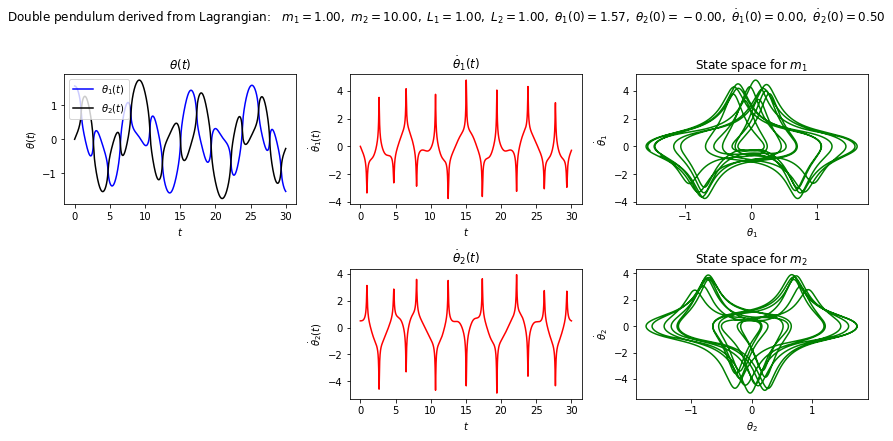

In [173]:
# both plots: same initial conditions
theta1_0 = np.pi/2
theta2_0 = -0.
theta1_dot_0 = 0.
theta2_dot_0 = 0.5
theta1, theta2, theta1_dot, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(12,6))
overall_title = 'Double pendulum derived from Lagrangian:  ' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f},$' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$'

# \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=rf'$\theta_1(t)$', 
            title=rf'$\theta(t)$', 
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            color='black',
            label=rf'$\theta_2(t)$',
            ax=ax_a)    
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta1_dot[start : stop], 
            axis_labels=theta1_dot_labels, 
            color='red',
            label=None, 
            title=rf'$\dot\theta_1(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, 30., t_end)    
plot_y_vs_x(theta1[start : stop], theta1_dot[start : stop], 
            axis_labels=state_space_1_labels, 
            color='green',
            label=None, 
            title=rf'State space for $m_1$', 
            ax=ax_c)   
                              
# second plot: phi_dot plot 
ax_e = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta2_dot[start : stop], 
            axis_labels=theta2_dot_labels, 
            color='red',
            label=None, 
            title=rf'$\dot\theta_2(t)$', 
            ax=ax_e)    

# third plot: state space plot from t=30 to t=50   
ax_f = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, 30., t_end)    
plot_y_vs_x(theta2[start : stop], theta2_dot[start : stop], 
            axis_labels=state_space_2_labels, 
            color='green',
            label=None, 
            title=rf'State space for $m_2$', 
            ax=ax_f)    


fig.tight_layout()
fig.savefig('double_pendulum_final_hw.png', bbox_inches='tight')  

# Markers for Chaos:
2 different methods for demonstrating the double-pendulum system is chaotic.

In [159]:
L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate a pendulum 
p2 = DoublePendulum(g=g, L1=L1, L2=L2, m1=m1, m2=m2)

del_theta_labels = (r'$t$', r'$|\Delta\theta$|')
del_theta1_labels = (r'$t$', r'$|\delta\theta_1$|')
del_theta2_labels = (r'$t$', r'$|\delta\theta_2|$')

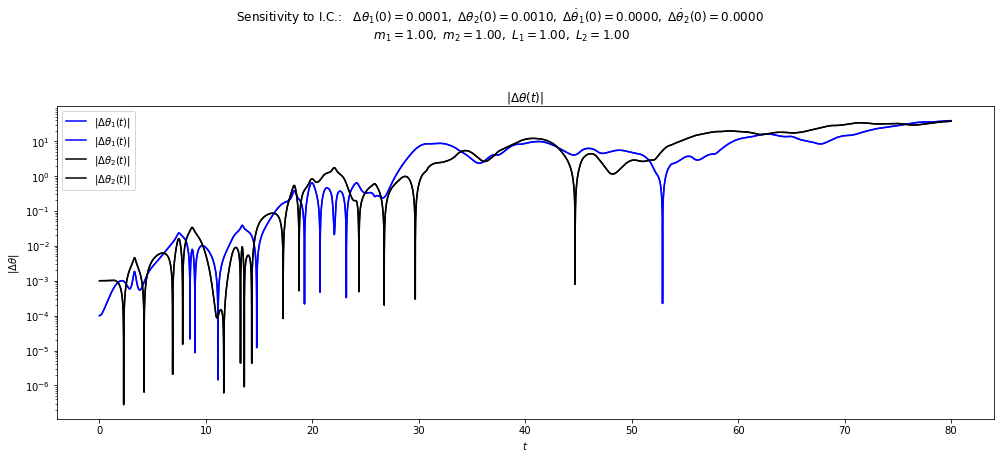

In [160]:
theta1_0_1 = np.pi
theta2_0_1 = np.pi/2
theta1_dot_0_1 = 0.
theta2_dot_0_1 = 0.

del_theta1_0 = 0.0001
del_theta1_dot_0 = 0.
del_theta2_0 = 0.001
del_theta2_dot_0 = 0.

theta1_0_2 = theta1_0_1 + del_theta1_0
theta2_0_2 = theta2_0_1 + del_theta2_0
theta1_dot_0_2 = theta1_dot_0_1 + del_theta1_dot_0
theta2_dot_0_2 = theta2_dot_0_1 + del_theta2_dot_0

theta1_1, theta2_1, theta1_dot_1, theta2_dot_1 = p2.solve_ode(t_pts, theta1_0_1, theta2_0_1, theta1_dot_0_1, theta2_dot_0_1)
theta1_2, theta2_2, theta1_dot_2, theta2_dot_2 = p2.solve_ode(t_pts, theta1_0_2, theta2_0_2, theta1_dot_0_2, theta2_dot_0_2)

del_theta1 = np.absolute(theta1_2 - theta1_1)
del_theta2 = np.absolute(theta2_2 - theta2_1)

fig2 = plt.figure(figsize=(14,6))
overall_title2 = 'Sensitivity to I.C.:  ' + \
                rf' $\Delta\theta_1(0) = {del_theta1_0:.4f}, $' + \
                rf' $\Delta\theta_2(0) = {del_theta2_0:.4f}, $' + \
                rf' $\Delta\dot\theta_1(0) = {del_theta1_dot_0:.4f}, $' + \
                rf' $\Delta\dot\theta_2(0) = {del_theta2_dot_0:.4f}$' + '\n' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f}$'

fig2.suptitle(overall_title2, va='baseline')
    
# first plot: phi plot 
semilogy = fig2.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], del_theta1[start : stop], 
            axis_labels=del_theta_labels, 
            color='blue',
            label=rf'$|\Delta\theta_1(t)|$', 
            title=rf'$|\Delta\theta(t)|$', 
            semilogy=semilogy)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], del_theta2[start : stop],
            color='black',
            label=rf'$|\Delta\theta_2(t)|$',
            semilogy=semilogy)

fig2.tight_layout()
fig2.savefig('dp_chaos1_final_hw.png', bbox_inches='tight')  
